In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ton_iot = pd.read_csv('NF-BoT-IoT-v2.csv')


In [7]:
ton_iot.Label

0           1
1           1
2           1
3           1
4           1
           ..
37763492    1
37763493    1
37763494    1
37763495    1
37763496    1
Name: Label, Length: 37763497, dtype: int64

In [8]:


y_b = ton_iot['Label']                # Target

ton_iot = ton_iot.drop(columns='Label')   # Features



NameError: name 'train_test_split' is not defined

### Deletes features from 

In [10]:
categorical_feature = ['L4_SRC_PORT','L4_DST_PORT','IPV4_SRC_ADDR',
                       'IPV4_DST_ADDR','PROTOCOL','L7_PROTO','DNS_QUERY_TYPE','ICMP_TYPE'
                        ,'ICMP_IPV4_TYPE','DNS_TTL_ANSWER']

not_used = ['DNS_QUERY_ID','FTP_COMMAND_RET_CODE']

tagets = ['Attack']

to_drop_corr_col = ['SERVER_TCP_FLAGS','MAX_TTL','MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','RETRANSMITTED_IN_PKTS','NUM_PKTS_1024_TO_1514_BYTES']

to_drop_VIF =['NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_256_TO_512_BYTES','CLIENT_TCP_FLAGS', 'IN_BYTES']

to_drop = categorical_feature+not_used+tagets + to_drop_corr_col + to_drop_VIF

X_Numerical = ton_iot.drop(columns=to_drop)





In [11]:
X_Numerical['SRC_TO_DST_SECOND_BYTES'] = X_Numerical['SRC_TO_DST_SECOND_BYTES'].astype(int)
X_Numerical['DST_TO_SRC_SECOND_BYTES'] = X_Numerical['DST_TO_SRC_SECOND_BYTES'].astype(int)

In [12]:
X_Numerical.shape

(3776350, 21)

## Scaling of Numerical value using  quantile

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Numerical_sc = pd.DataFrame()

scaler.fit(X_Numerical)

X_Numerical_sc[X_Numerical.columns] = scaler.transform(X_Numerical)

In [14]:
X_Numerical_sc.shape

(3776350, 21)

In [15]:
print('Numerical')
print(25*0.8)
print(25*0.5)
print(25*0.2)
print('categorical')
print(10*0.8)
print(10*0.5)
print(10*0.2)

Numerical
20.0
12.5
5.0
categorical
8.0
5.0
2.0


## Scale data

In [17]:
from sklearn.feature_selection import f_classif, SelectKBest

sb = SelectKBest(f_classif, k=5)
sb.fit(X_Numerical_sc,y_b)
col_anova_20 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=13)
sb.fit(X_Numerical_sc,y_b)
col_anova_50 = sb.get_feature_names_out()

##########################
sb = SelectKBest(f_classif, k=20)
sb.fit(X_Numerical_sc,y_b)
col_anova_80 = sb.get_feature_names_out()

In [18]:
X_A_20 = X_Numerical_sc[col_anova_20]
X_A_50 = X_Numerical_sc[col_anova_50]
X_A_80 = X_Numerical_sc[col_anova_80]

In [19]:
list(col_anova_80)

['IN_PKTS',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'DURATION_OUT',
 'MIN_TTL',
 'LONGEST_FLOW_PKT',
 'SHORTEST_FLOW_PKT',
 'SRC_TO_DST_SECOND_BYTES',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_UP_TO_128_BYTES',
 'NUM_PKTS_128_TO_256_BYTES',
 'TCP_WIN_MAX_IN']

## Kendall

In [20]:
from scipy.stats import kendalltau
features = [col for col in X_Numerical_sc.columns if col ]
kendall_tau_scores = {}
for feature in features:
    kendall_tau, _ = kendalltau(X_Numerical_sc[feature], y_b)
    kendall_tau_scores[feature] = kendall_tau
    
sorted_kendall_tau_scores = sorted(kendall_tau_scores.items(), key=lambda x: abs(x[1]), reverse=True)

col_kendall_20 = [feature for feature, score in sorted_kendall_tau_scores[:5]]
col_kendall_50 = [feature for feature, score in sorted_kendall_tau_scores[:13]]
col_kendall_80 = [feature for feature, score in sorted_kendall_tau_scores[:20]]


In [21]:
X_K_20 = X_Numerical_sc[col_kendall_20]
X_K_50 = X_Numerical_sc[col_kendall_50]
X_K_80 = X_Numerical_sc[col_kendall_80]
X_K_80.columns

Index(['DURATION_OUT', 'RETRANSMITTED_OUT_PKTS', 'RETRANSMITTED_OUT_BYTES',
       'MIN_TTL', 'OUT_PKTS', 'OUT_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'TCP_WIN_MAX_OUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'IN_PKTS', 'TCP_FLAGS',
       'SRC_TO_DST_SECOND_BYTES', 'TCP_WIN_MAX_IN', 'DURATION_IN',
       'FLOW_DURATION_MILLISECONDS', 'LONGEST_FLOW_PKT',
       'NUM_PKTS_UP_TO_128_BYTES', 'RETRANSMITTED_IN_BYTES',
       'NUM_PKTS_128_TO_256_BYTES', 'SRC_TO_DST_AVG_THROUGHPUT'],
      dtype='object')

In [22]:
list(X_K_80.columns)

['DURATION_OUT',
 'RETRANSMITTED_OUT_PKTS',
 'RETRANSMITTED_OUT_BYTES',
 'MIN_TTL',
 'OUT_PKTS',
 'OUT_BYTES',
 'DST_TO_SRC_SECOND_BYTES',
 'TCP_WIN_MAX_OUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'IN_PKTS',
 'TCP_FLAGS',
 'SRC_TO_DST_SECOND_BYTES',
 'TCP_WIN_MAX_IN',
 'DURATION_IN',
 'FLOW_DURATION_MILLISECONDS',
 'LONGEST_FLOW_PKT',
 'NUM_PKTS_UP_TO_128_BYTES',
 'RETRANSMITTED_IN_BYTES',
 'NUM_PKTS_128_TO_256_BYTES',
 'SRC_TO_DST_AVG_THROUGHPUT']

## PCA

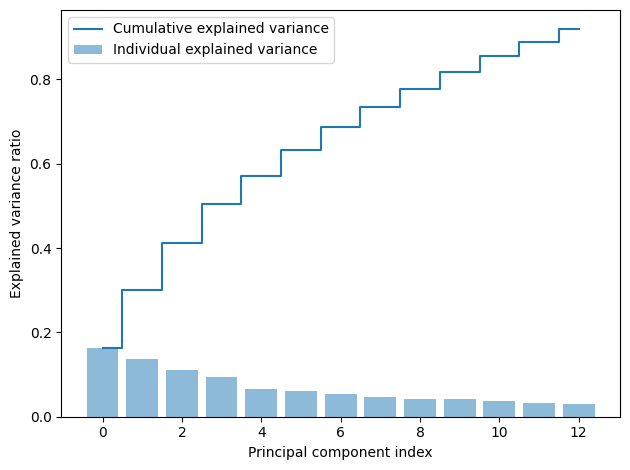

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np 

pca = PCA(n_components=13)

#
X_train_pca = pca.fit_transform(X_Numerical_sc)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
X_train_pca.shape
columns_pca = [f"C{idx}" for idx in range(13) ]
X_PCA = pd.DataFrame(X_train_pca,columns=columns_pca)


In [25]:
cum_sum_eigenvalues

array([0.16233776, 0.29967009, 0.41152203, 0.50517581, 0.57036404,
       0.63211504, 0.68702048, 0.73465884, 0.77733755, 0.81843786,
       0.85619775, 0.88912602, 0.91869348])

# Optimize the features

### L4_SRC_PORT & L4_DST_PORT

Ports with numbers 0–1023 are called system or well-known ports; ports with numbers 1024-49151 are called user or registered ports, and ports with numbers 49152-65535 are called dynamic, private or ephemeral ports.[2] Both system and user ports are used by transport protocols (TCP, UDP, DCCP, SCTP) to identify an application or service.

In [26]:
well_known_port = list(range(1024))
registered_ports = list(range(1024,49152))
ephemeral_ports = list(range(49152,65535))

In [27]:
X_cat =  ton_iot[categorical_feature]


In [28]:
X_cat['L4_SRC_PORT_C'] = 'Others'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_SRC_PORT_C'][X_cat['L4_SRC_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_SRC_PORT'],inplace=True)

X_cat['L4_SRC_PORT_C'].value_counts()

print(X_cat.shape)

(3776350, 10)


In [29]:
X_cat['L4_DST_PORT_C'] = 'Others'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(well_known_port)] = 'well_known_port'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(registered_ports)] = 'registered_ports'
X_cat['L4_DST_PORT_C'][X_cat['L4_DST_PORT'].isin(ephemeral_ports)] = 'ephemeral_ports'

X_cat.drop(columns=['L4_DST_PORT'],inplace=True)
X_cat['L4_DST_PORT_C'].value_counts()


L4_DST_PORT_C
well_known_port     3621698
registered_ports     122718
ephemeral_ports       31895
Others                   39
Name: count, dtype: int64

#### Removerd features are :

to_drop_zero = ['RETRANSMITTED_IN_BYTES','RETRANSMITTED_IN_PKTS','RETRANSMITTED_OUT_BYTES','FTP_COMMAND_RET_CODE','ICMP_TYPE','DNS_TTL_ANSWER']
&&

['SERVER_TCP_FLAGS', 'MAX_TTL', 'MAX_IP_PKT_LEN', 'RETRANSMITTED_OUT_PKTS', 'ICMP_IPV4_TYPE']

## DNS

In [30]:
X_cat['DNS_QUERY_TYPE'] = X_cat['DNS_QUERY_TYPE'].astype('O')
list_proto = [0]
X_cat['DNS_QUERY_TYPE'][~X_cat['DNS_QUERY_TYPE'].isin(list_proto)] = 1
X_cat['DNS_QUERY_TYPE'].value_counts()

DNS_QUERY_TYPE
0    3775669
1        681
Name: count, dtype: int64

### PROTOCOL

In [31]:
X_cat['PROTOCOL'] = X_cat['PROTOCOL'].astype(int)

X_cat['PROTOCOL'].value_counts()

PROTOCOL
6     1941743
17    1834352
1         255
Name: count, dtype: int64

In [32]:
print(X_cat.shape)

(3776350, 10)


In [33]:
X_cat['PROTOCOL'].value_counts()

PROTOCOL
6     1941743
17    1834352
1         255
Name: count, dtype: int64

### L7_PROTO

In [34]:
X_cat['L7_PROTO'] = X_cat['L7_PROTO'].astype('O')
list_proto = [0,7,118]
X_cat['L7_PROTO'][~X_cat['L7_PROTO'].isin(list_proto)] = 'Other'
X_cat['L7_PROTO'].value_counts()

L7_PROTO
Other    1837874
7.0      1780062
0.0       158414
Name: count, dtype: int64

#### Adresses

### Adress Range

In [35]:
# Private adresses
# Class A: 10.0.0.0 to 10.255.255.255
# Class B: 172.16.0.0 to 172.31.255.255
# Class C: 192.168.0.0 to 192.168.255.255
from ipaddress import ip_address


def findIPs(start, end):
    start = ip_address(start)
    end = ip_address(end)
    result = []
    while start <= end:
        result.append(str(start))
        start += 1
    return result
print('classe_a process ------------------------------->')
plage_classe_a=findIPs('10.0.0.0', '10.255.255.255')
print('classe_b process ------------------------------->')
plage_classe_b=findIPs('172.16.0.0', '172.31.255.255')
print('classe_c process ------------------------------->')
plage_classe_c=findIPs('192.168.0.0', '192.168.255.255')

classe_a process ------------------------------->
classe_b process ------------------------------->
classe_c process ------------------------------->


In [36]:
import numpy as np
X_cat['IPV4_DST_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_DST_ADDR_CLASSE'][X_cat['IPV4_DST_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_DST_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


IPV4_DST_ADDR_CLASSE
classe_c        3775905
public/other        445
Name: count, dtype: int64

In [37]:
import numpy as np
X_cat['IPV4_SRC_ADDR_CLASSE'] = 'None'
print('classe_c process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_c)] = 'classe_c'
print('classe_b process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_b)] = 'classe_b'
print('classe_a process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'].isin(plage_classe_a)] = 'classe_a'
print('localhost process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR'] == '127.0.0.1'] = 'localhost'
print('public/other process ------------------------------->')
X_cat['IPV4_SRC_ADDR_CLASSE'][X_cat['IPV4_SRC_ADDR_CLASSE'] == 'None'] = 'public/other'
X_cat['IPV4_SRC_ADDR_CLASSE'].value_counts()

classe_c process ------------------------------->
classe_b process ------------------------------->
classe_a process ------------------------------->
localhost process ------------------------------->
public/other process ------------------------------->


IPV4_SRC_ADDR_CLASSE
classe_c        3776347
public/other          3
Name: count, dtype: int64

Remove IPV4_SRC_ADDR & IPV4_DST_ADDR and Keep IPV4_SRC_ADDR IPV4_DST_ADDR

In [38]:
X_cat.drop(columns=['IPV4_SRC_ADDR','IPV4_DST_ADDR'], inplace=True)

## Optimze the 3 features ICMP_TYPE, ICMP_IPV4_TYPE, DNS_TTL_ANSWER

In [39]:
import math
infini = math.inf

X_cat['ICMP_TYPE'] = X_cat['ICMP_TYPE'].astype('O')
X_cat['ICMP_IPV4_TYPE'] = X_cat['ICMP_IPV4_TYPE'].astype('O')
X_cat['DNS_TTL_ANSWER'] = X_cat['DNS_TTL_ANSWER'].astype('O')

X_cat['ICMP_TYPE'][~(X_cat['ICMP_TYPE']==0)]=1
X_cat['ICMP_IPV4_TYPE'][~(X_cat['ICMP_IPV4_TYPE']==0)]=1
X_cat['DNS_TTL_ANSWER'][~(X_cat['DNS_TTL_ANSWER']==0)]=1

print(f"ICMPTYPE {X_cat['ICMP_TYPE'].value_counts()}, \n ICMP_IPV4_TYPE  {X_cat['ICMP_IPV4_TYPE'].value_counts()}, \n  DNS_TTL_ANSWER  {X_cat['DNS_TTL_ANSWER'].value_counts()}")



ICMPTYPE ICMP_TYPE
0    3282756
1     493594
Name: count, dtype: int64, 
 ICMP_IPV4_TYPE  ICMP_IPV4_TYPE
0    3282765
1     493585
Name: count, dtype: int64, 
  DNS_TTL_ANSWER  DNS_TTL_ANSWER
0    3776075
1        275
Name: count, dtype: int64


In [40]:
X_cat.head(4)

,PROTOCOL,L7_PROTO,DNS_QUERY_TYPE,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_TTL_ANSWER,L4_SRC_PORT_C,L4_DST_PORT_C,IPV4_DST_ADDR_CLASSE,IPV4_SRC_ADDR_CLASSE
21521337,17,Other,0,0,0,0,registered_ports,well_known_port,classe_c,classe_c
26812985,17,Other,0,0,0,0,ephemeral_ports,well_known_port,classe_c,classe_c
14582714,6,7.0,0,0,0,0,registered_ports,well_known_port,classe_c,classe_c
17257256,17,Other,0,0,0,0,registered_ports,well_known_port,classe_c,classe_c


# Feature Selection Filter-based

In [41]:
from sklearn.feature_selection import chi2

# Convert string values in categorical features to numerical
X_cat = X_cat.replace('Other',999)
X_cat = X_cat.replace('Others',999)
X_cat = X_cat.replace('well_known_port',0)
X_cat = X_cat.replace('registered_ports',1)
X_cat = X_cat.replace('ephemeral_ports',2)



X_cat = X_cat.replace('localhost',0)
X_cat = X_cat.replace('classe_a',1)
X_cat = X_cat.replace('classe_b',2)
X_cat = X_cat.replace('classe_c',3)
X_cat = X_cat.replace('public/other',4)


X_cat = X_cat.astype(int)



#X.dropna(inplace=True)

#X = X.astype(int)



In [38]:
columns_ranked_chi2

['L7_PROTO',
 'L4_DST_PORT_C',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L4_SRC_PORT_C',
 'ICMP_IPV4_TYPE',
 'ICMP_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [42]:
chi2_corr = chi2(X_cat,y_b)

columns_ranked_chi2 = list(X_cat.columns[np.argsort(-chi2_corr[0])])
columns_ranked_chi2

['L7_PROTO',
 'L4_DST_PORT_C',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L4_SRC_PORT_C',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

## Ranking of features using CHI2

# We will select 3 pourcentage from the rest of the features
categorical
- 8.0
- 5.0
- 2.0

NameError: name 'mi_scores' is not defined

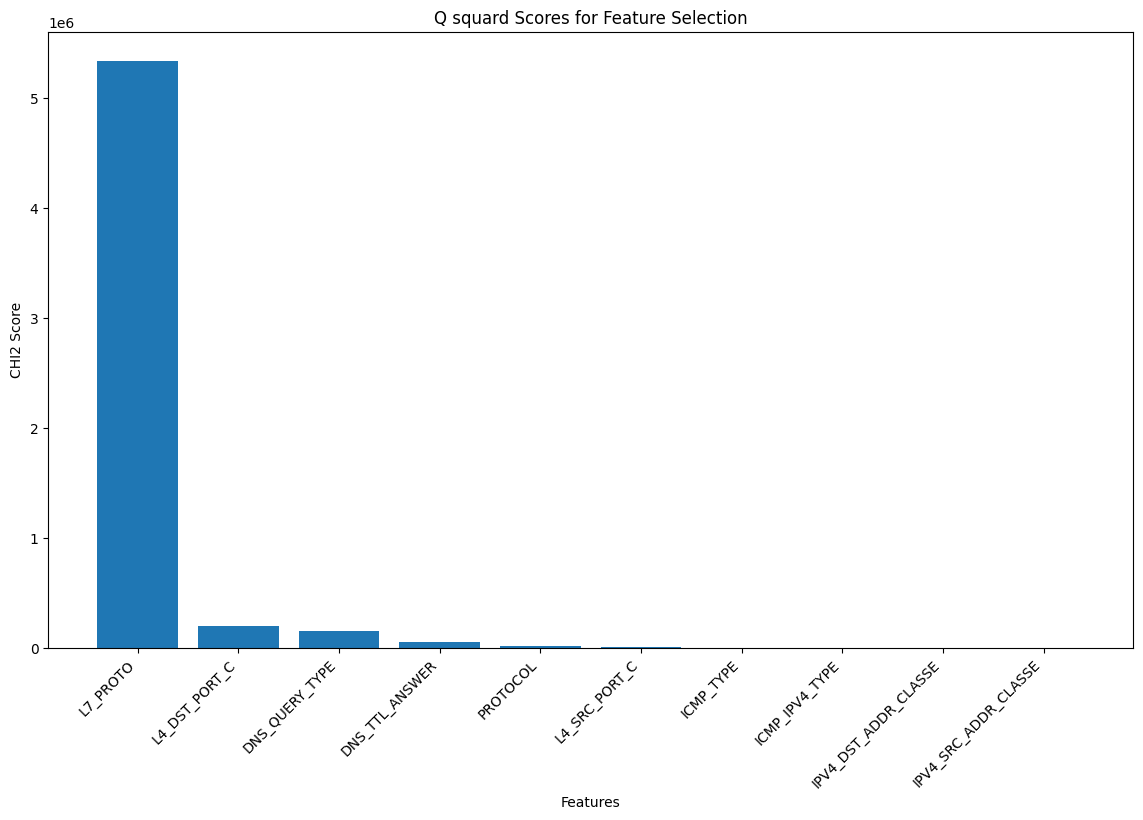

In [43]:
import matplotlib.pyplot as plt

chi2_scores = -np.sort(-chi2_corr[0])
feature_names_chi2 = columns_ranked_chi2

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(feature_names_chi2)), chi2_scores, align='center')
plt.xticks(range(len(feature_names_chi2)), feature_names_chi2, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("CHI2 Score")
plt.title("Q squard Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

### Generate the 3 databases for chi 2

In [44]:
X_chi2_20 = X_cat[columns_ranked_chi2[:2]]
X_chi2_50 =  X_cat[columns_ranked_chi2[:5]]
X_chi2_80 =  X_cat[columns_ranked_chi2[:8]]

dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
list_dummy_20 = list(set( list(X_chi2_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_chi2_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_chi2_80.columns)).intersection(dummy_feature))


X_chi2_20 = pd.get_dummies(X_chi2_20, columns=list_dummy_20)
X_chi2_50 = pd.get_dummies(X_chi2_50, columns=list_dummy_50)
X_chi2_80 = pd.get_dummies(X_chi2_80, columns=list_dummy_80)

# MUTUAL INFORMATION

In [45]:
columns_ranked_mi = ['DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'PROTOCOL',
 'L7_PROTO',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'IPV4_DST_ADDR_CLASSE',
 'IPV4_SRC_ADDR_CLASSE']

In [46]:
X_MI_20 = X_cat[columns_ranked_mi[:2]]
X_MI_50 =  X_cat[columns_ranked_mi[:5]]
X_MI_80 =  X_cat[columns_ranked_mi[:8]]

list_dummy_20 = list(set( list(X_MI_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_MI_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_MI_80.columns)).intersection(dummy_feature))


X_MI_20 = pd.get_dummies(X_MI_20, columns=list_dummy_20)
X_MI_50 = pd.get_dummies(X_MI_50, columns=list_dummy_50)
X_MI_80 = pd.get_dummies(X_MI_80, columns=list_dummy_80)

## mRMR

In [47]:
from mrmr import mrmr_classif
selected_features_20 = mrmr_classif(X=X_cat, y=y_b, K=2)
selected_features_50 = mrmr_classif(X=X_cat, y=y_b, K=5)
selected_features_80 = mrmr_classif(X=X_cat, y=y_b, K=8)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.73s/it]


In [48]:
X_mrmr_80 = X_cat[selected_features_80]
X_mrmr_50 = X_cat[selected_features_50]
X_mrmr_20 = X_cat[selected_features_20]

list_dummy_20 = list(set( list(X_mrmr_20.columns)).intersection(dummy_feature))
list_dummy_50 = list(set( list(X_mrmr_50.columns)).intersection(dummy_feature))
list_dummy_80 = list(set( list(X_mrmr_80.columns)).intersection(dummy_feature))

X_mrmr_20 = pd.get_dummies(X_mrmr_20, columns=list_dummy_20)
X_mrmr_50 = pd.get_dummies(X_mrmr_50, columns=list_dummy_50)
X_mrmr_80 = pd.get_dummies(X_mrmr_80, columns=list_dummy_80)

In [49]:
selected_features_80

['DNS_QUERY_TYPE',
 'L7_PROTO',
 'IPV4_SRC_ADDR_CLASSE',
 'IPV4_DST_ADDR_CLASSE',
 'L4_SRC_PORT_C',
 'L4_DST_PORT_C',
 'DNS_TTL_ANSWER',
 'PROTOCOL']

In [50]:
import matplotlib.pyplot as plt

mi_scores = -np.sort(-mi_class)
feature_names = columns_ranked_mi

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(feature_names)), mi_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Scores for Feature Selection")

# Add MI score values at the top of each bar
for bar, score in zip(bars, mi_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 3),
             ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

NameError: name 'mi_class' is not defined

In [202]:
import pickle

class Company(object):
    def __init__(self, name, value):
        self.name = name
        self.value = value

with open('attribute/bot_num.pkl', 'wb') as outp:
    company1 = Company('mi_class', mi_class)
    pickle.dump(company1, outp, pickle.HIGHEST_PROTOCOL)

    company2 = Company('selected_features_80', selected_features_80)
    pickle.dump(company2, outp, pickle.HIGHEST_PROTOCOL)
    
    company3 = Company('chi2_corr', chi2_corr)
    pickle.dump(company3, outp, pickle.HIGHEST_PROTOCOL)
    
    company4 = Company('sorted_kendall_tau_scores', sorted_kendall_tau_scores)
    pickle.dump(company4, outp, pickle.HIGHEST_PROTOCOL)
    
    company5 = Company('sb_anova', sb)
    pickle.dump(company5, outp, pickle.HIGHEST_PROTOCOL)



"""with open('company_data.pkl', 'rb') as inp:
    company1 = pickle.load(inp)
    print(company1.name)  # -> banana
    print(company1.value)  # -> 40

    company2 = pickle.load(inp)
    print(company2.name) # -> spam
    print(company2.value)  # -> 42"""

"with open('company_data.pkl', 'rb') as inp:\n    company1 = pickle.load(inp)\n    print(company1.name)  # -> banana\n    print(company1.value)  # -> 40\n\n    company2 = pickle.load(inp)\n    print(company2.name) # -> spam\n    print(company2.value)  # -> 42"

### Decision Tree

### MI

In [48]:
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


In [49]:
from sklearn import tree
from sklearn.model_selection import KFold
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,cohen_kappa_score,matthews_corrcoef


def my_grid_result_df(clf,hyperparams,data_name,algo_name,X,y):
    
    scoring = {"Accuracy": "accuracy", "F1-Score":'f1' ,"Recall": 'recall',
               "Precision":"precision","MCC":make_scorer(matthews_corrcoef), "Kappa":make_scorer(cohen_kappa_score)}
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    search = GridSearchCV(clf, hyperparams, scoring=scoring, n_jobs=-1, cv=cv_inner, refit="MCC")
    grid_result = search.fit(X, y)

    json_dump = json.dumps(grid_result.cv_results_,cls=NumpyEncoder)
    # Serializing json

    # Writing to sample.json
    with open(f"./result_bot_num_bin/{algo_name}__{data_name}.json", "w") as outfile:
        outfile.write(json_dump)


In [45]:
X_A_20.shape

(37763497, 5)

In [46]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_20.shape

(37763497, 12)

In [58]:
for var in [
    X_A_20, X_chi2_20, X_A_50, X_chi2_50, X_A_80, X_chi2_80,
    X_MI_20, X_MI_50, X_MI_80,
    X_mrmr_20, X_mrmr_50, X_mrmr_80,
    X_K_20, X_K_50, X_K_80
]:
    var.reset_index(drop=True, inplace=True)

In [59]:
X_A_chi2_20 = pd.concat([X_A_20,X_chi2_20],axis=1)
X_A_chi2_50 = pd.concat([X_A_50,X_chi2_50],axis=1)
X_A_chi2_80 = pd.concat([X_A_80,X_chi2_80],axis=1)

X_A_MI_20 = pd.concat([X_A_20,X_MI_20],axis=1)
X_A_MI_50= pd.concat([X_A_50,X_MI_50],axis=1)
X_A_MI_80= pd.concat([X_A_80,X_MI_80],axis=1)

X_A_mRMR_20 = pd.concat([X_A_20,X_mrmr_20],axis=1)
X_A_mRMR_50 = pd.concat([X_A_50,X_mrmr_50],axis=1)
X_A_mRMR_80 = pd.concat([X_A_80,X_mrmr_80],axis=1)

X_K_chi2_20 = pd.concat([X_K_20,X_chi2_20],axis=1)
X_K_chi2_50 = pd.concat([X_K_50,X_chi2_50],axis=1)
X_K_chi2_80 = pd.concat([X_K_80,X_chi2_80],axis=1)

X_K_MI_20 = pd.concat([X_K_20,X_MI_20],axis=1)
X_K_MI_50 = pd.concat([X_K_50,X_MI_50],axis=1)
X_K_MI_80 = pd.concat([X_K_80,X_MI_80],axis=1)

X_K_mRMR_20 = pd.concat([X_K_20,X_mrmr_20],axis=1)
X_K_mRMR_50 = pd.concat([X_K_50,X_mrmr_50],axis=1)
X_K_mRMR_80 = pd.concat([X_K_80,X_mrmr_80],axis=1)

X_PCA_chi2  = pd.concat([X_PCA,X_chi2_80],axis=1)
X_PCA_MI = pd.concat([X_PCA,X_MI_80],axis=1)
X_PCA_mRMR = pd.concat([X_PCA,X_mrmr_80],axis=1)

In [60]:
print(X_A_chi2_20.shape)
print(X_A_chi2_50.shape)
print(X_A_chi2_80.shape)
print(X_A_MI_20.shape)
print(X_A_MI_50.shape)
print(X_A_MI_80.shape)
print(X_A_mRMR_20.shape)
print(X_A_mRMR_50.shape)
print(X_A_mRMR_80.shape)
print(X_K_chi2_20.shape)
print(X_K_chi2_50.shape)
print(X_K_chi2_80.shape)
print(X_K_MI_20.shape)
print(X_K_MI_50.shape)
print(X_K_MI_80.shape)
print(X_K_mRMR_20.shape)
print(X_K_mRMR_50.shape)
print(X_K_mRMR_80.shape)
print(X_PCA_chi2.shape)
print(X_PCA_MI.shape)
print(X_PCA_mRMR.shape)

(3776350, 12)
(3776350, 25)
(3776350, 38)
(3776350, 7)
(3776350, 22)
(3776350, 38)
(3776350, 9)
(3776350, 25)
(3776350, 40)
(3776350, 12)
(3776350, 25)
(3776350, 38)
(3776350, 7)
(3776350, 22)
(3776350, 38)
(3776350, 9)
(3776350, 25)
(3776350, 40)
(3776350, 31)
(3776350, 31)
(3776350, 33)


In [62]:
for var in [
    X_cat, X_Numerical_sc]:
    var.reset_index(drop=True, inplace=True)

In [63]:


dummy_feature = ['L4_SRC_PORT_C','L4_DST_PORT_C','IPV4_SRC_ADDR_CLASSE',
                 'IPV4_DST_ADDR_CLASSE','PROTOCOL','L7_PROTO']
X_cat_dm = pd.get_dummies(X_cat, columns=dummy_feature)
X =  pd.concat([X_Numerical_sc,X_cat_dm],axis=1)
X.shape

(3776350, 43)

In [55]:
datasets = {"X_A_chi2_20":X_A_chi2_20,
"X_A_chi2_50":X_A_chi2_50,
"X_A_chi2_80":X_A_chi2_80,
"X_A_MI_20":X_A_MI_20,
"X_A_MI_50":X_A_MI_50,
"X_A_MI_80":X_A_MI_80,
"X_A_mRMR_20":X_A_mRMR_20,
"X_A_mRMR_50":X_A_mRMR_50,
"X_A_mRMR_80":X_A_mRMR_80,
"X_K_chi2_20":X_K_chi2_20,
"X_K_chi2_50":X_K_chi2_50,
"X_K_chi2_80":X_K_chi2_80,
"X_K_MI_20":X_K_MI_20,
"X_K_MI_50":X_K_MI_50,
"X_K_MI_80":X_K_MI_80,
"X_K_mRMR_20":X_K_mRMR_20,
"X_K_mRMR_50":X_K_mRMR_50,
"X_K_mRMR_80":X_K_mRMR_80,
"X_PCA_chi2":X_PCA_chi2,
"X_PCA_MI":X_PCA_MI,
"X_PCA_mRMR":X_PCA_mRMR,
           "X":X}

In [56]:
import datetime
def create_all_result(clf,algo_name,hyperparams,datasets,y):
    for k,v in datasets.items():
        now = datetime.datetime.now()
        print(f'======== process======= dataset : {k} \t time is {now}')
        my_grid_result_df(clf,hyperparams,k,algo_name,v,y)
        now = datetime.datetime.now()
        print(f'======== Done  ======== dataset : {k} \t time is {now}')
        print('\n')


# Decision Tree

In [57]:
clf = tree.DecisionTreeClassifier()
hyperparams = {}
create_all_result(clf,'DecisionTreeClassifier',hyperparams,datasets,y_b)

======== process======= dataset : X_A_chi2_20 	 time is 2023-04-07 19:23:13.252162
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-04-07 19:26:41.456705


======== process======= dataset : X_A_chi2_50 	 time is 2023-04-07 19:26:41.456705
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-04-07 19:53:27.587754


======== process======= dataset : X_A_chi2_80 	 time is 2023-04-07 19:53:27.587754
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-04-07 20:43:09.568405


======== process======= dataset : X_A_MI_20 	 time is 2023-04-07 20:43:09.568405
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-07 20:45:52.612822


======== process======= dataset : X_A_MI_50 	 time is 2023-04-07 20:45:52.612822
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-07 21:17:16.357274


======== process======= dataset : X_A_MI_80 	 time is 2023-04-07 21:17:16.357274
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-04-07 22:15:22.431755


====

In [58]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

### AdaBoostClassifier, GradientBoostingClassifier


In [59]:
def print_skip():
    print('\n')
    print('*************** \t ******************* \t ****************')
    print('*************** \t ******************* \t ****************')
    print('\n')

In [62]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from xgboost import  XGBClassifier


clf = GradientBoostingClassifier(random_state=0)
hyperparams = {'n_estimators':[50, 100, 150,200]}

print('======================= GradientBoostingClassifier =====================')
create_all_result(clf,'GradientBoostingClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= AdaBoostClassifier =====================')
clf =  AdaBoostClassifier(random_state=0)
create_all_result(clf,'AdaBoostClassifier',hyperparams,datasets,y_b)
print_skip()


print('======================= XGBClassifier =====================')
clf = XGBClassifier(random_state=0)
create_all_result(clf,'XGBClassifier',hyperparams,datasets,y_b)
print_skip()

print('======================= LGBMClassifier =====================')
clf = LGBMClassifier(random_state=0)
create_all_result(clf,'LGBMClassifier',hyperparams,datasets,y_b)


print_skip()

print('======================= CatBoostClassifier =====================')
clf =  CatBoostClassifier(random_state=0)
create_all_result(clf,'CatBoostClassifier',hyperparams,datasets,y_b)


======================= GradientBoostingClassifier =====================
======== process======= dataset : X_A_chi2_20 	 time is 2023-04-08 13:53:03.559603
======== Done  ======== dataset : X_A_chi2_20 	 time is 2023-04-08 16:13:59.320284


======== process======= dataset : X_A_chi2_50 	 time is 2023-04-08 16:13:59.320284
======== Done  ======== dataset : X_A_chi2_50 	 time is 2023-04-09 05:46:01.322404


======== process======= dataset : X_A_chi2_80 	 time is 2023-04-09 05:46:01.322404
======== Done  ======== dataset : X_A_chi2_80 	 time is 2023-04-09 19:48:14.612046


======== process======= dataset : X_A_MI_20 	 time is 2023-04-09 19:48:14.613047
======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-09 21:42:27.488749


======== process======= dataset : X_A_MI_50 	 time is 2023-04-09 21:42:27.488749
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-10 06:14:46.681602


======== process======= dataset : X_A_MI_80 	 time is 2023-04-10 06:14:46.681602
======== Done 

======== Done  ======== dataset : X_A_MI_20 	 time is 2023-04-25 07:18:49.631090


======== process======= dataset : X_A_MI_50 	 time is 2023-04-25 07:18:49.646716
======== Done  ======== dataset : X_A_MI_50 	 time is 2023-04-25 10:44:44.773873


======== process======= dataset : X_A_MI_80 	 time is 2023-04-25 10:44:44.773873
======== Done  ======== dataset : X_A_MI_80 	 time is 2023-04-25 15:22:08.098352


======== process======= dataset : X_A_mRMR_20 	 time is 2023-04-25 15:22:08.160859
======== Done  ======== dataset : X_A_mRMR_20 	 time is 2023-04-25 16:53:08.219361


======== process======= dataset : X_A_mRMR_50 	 time is 2023-04-25 16:53:08.219361
======== Done  ======== dataset : X_A_mRMR_50 	 time is 2023-04-25 20:14:07.008975


======== process======= dataset : X_A_mRMR_80 	 time is 2023-04-25 20:14:07.008975
======== Done  ======== dataset : X_A_mRMR_80 	 time is 2023-04-26 00:57:48.139566


======== process======= dataset : X_K_chi2_20 	 time is 2023-04-26 00:57:48.389595
==

21:	learn: 0.0011770	total: 29.5s	remaining: 2m 51s
22:	learn: 0.0011653	total: 30.7s	remaining: 2m 49s
23:	learn: 0.0011605	total: 31.9s	remaining: 2m 47s
24:	learn: 0.0011420	total: 33.2s	remaining: 2m 45s
25:	learn: 0.0011187	total: 34.4s	remaining: 2m 43s
26:	learn: 0.0011069	total: 35.5s	remaining: 2m 41s
27:	learn: 0.0011034	total: 36.7s	remaining: 2m 39s
28:	learn: 0.0010973	total: 38s	remaining: 2m 38s
29:	learn: 0.0010915	total: 39.2s	remaining: 2m 36s
30:	learn: 0.0010853	total: 40.4s	remaining: 2m 34s
31:	learn: 0.0010821	total: 41.6s	remaining: 2m 33s
32:	learn: 0.0010774	total: 42.8s	remaining: 2m 31s
33:	learn: 0.0010775	total: 44s	remaining: 2m 29s
34:	learn: 0.0010751	total: 45.1s	remaining: 2m 28s
35:	learn: 0.0010693	total: 46.3s	remaining: 2m 26s
36:	learn: 0.0010671	total: 47.6s	remaining: 2m 25s
37:	learn: 0.0010646	total: 48.8s	remaining: 2m 23s
38:	learn: 0.0010622	total: 50s	remaining: 2m 22s
39:	learn: 0.0010525	total: 51.2s	remaining: 2m 20s
40:	learn: 0.00098

25:	learn: 0.0011601	total: 41.8s	remaining: 38.5s
26:	learn: 0.0011601	total: 43.2s	remaining: 36.8s
27:	learn: 0.0011601	total: 44.6s	remaining: 35.1s
28:	learn: 0.0011601	total: 46.1s	remaining: 33.4s
29:	learn: 0.0011601	total: 47.5s	remaining: 31.7s
30:	learn: 0.0011601	total: 48.9s	remaining: 30s
31:	learn: 0.0011352	total: 50.4s	remaining: 28.3s
32:	learn: 0.0011352	total: 51.8s	remaining: 26.7s
33:	learn: 0.0011352	total: 53.2s	remaining: 25s
34:	learn: 0.0011352	total: 54.6s	remaining: 23.4s
35:	learn: 0.0011352	total: 56.1s	remaining: 21.8s
36:	learn: 0.0011352	total: 57.5s	remaining: 20.2s
37:	learn: 0.0011352	total: 58.9s	remaining: 18.6s
38:	learn: 0.0011352	total: 1m	remaining: 17s
39:	learn: 0.0011352	total: 1m 1s	remaining: 15.5s
40:	learn: 0.0011352	total: 1m 3s	remaining: 13.9s
41:	learn: 0.0011352	total: 1m 4s	remaining: 12.3s
42:	learn: 0.0011352	total: 1m 6s	remaining: 10.8s
43:	learn: 0.0011352	total: 1m 7s	remaining: 9.21s
44:	learn: 0.0011352	total: 1m 8s	remain

78:	learn: 0.0053268	total: 1m 45s	remaining: 1m 34s
79:	learn: 0.0053147	total: 1m 47s	remaining: 1m 33s
80:	learn: 0.0052777	total: 1m 48s	remaining: 1m 32s
81:	learn: 0.0052712	total: 1m 49s	remaining: 1m 30s
82:	learn: 0.0053295	total: 1m 50s	remaining: 1m 29s
83:	learn: 0.0053256	total: 1m 51s	remaining: 1m 27s
84:	learn: 0.0056530	total: 1m 53s	remaining: 1m 26s
85:	learn: 0.0065139	total: 1m 54s	remaining: 1m 25s
86:	learn: 0.0056084	total: 1m 55s	remaining: 1m 23s
87:	learn: 0.0061655	total: 1m 57s	remaining: 1m 22s
88:	learn: 0.0044092	total: 1m 58s	remaining: 1m 21s
89:	learn: 0.0055207	total: 1m 59s	remaining: 1m 19s
90:	learn: 0.0028775	total: 2m 1s	remaining: 1m 18s
91:	learn: 0.0062288	total: 2m 2s	remaining: 1m 17s
92:	learn: 0.0053994	total: 2m 3s	remaining: 1m 15s
93:	learn: 0.0061397	total: 2m 5s	remaining: 1m 14s
94:	learn: 0.0053411	total: 2m 6s	remaining: 1m 13s
95:	learn: 0.0056160	total: 2m 7s	remaining: 1m 11s
96:	learn: 0.0036931	total: 2m 8s	remaining: 1m 10s


29:	learn: 0.0009018	total: 57.6s	remaining: 38.4s
30:	learn: 0.0009017	total: 59.1s	remaining: 36.2s
31:	learn: 0.0009017	total: 1m	remaining: 34s
32:	learn: 0.0009017	total: 1m 1s	remaining: 31.9s
33:	learn: 0.0009017	total: 1m 3s	remaining: 29.8s
34:	learn: 0.0009017	total: 1m 4s	remaining: 27.7s
35:	learn: 0.0009017	total: 1m 6s	remaining: 25.7s
36:	learn: 0.0009017	total: 1m 7s	remaining: 23.7s
37:	learn: 0.0009017	total: 1m 8s	remaining: 21.7s
38:	learn: 0.0009017	total: 1m 10s	remaining: 19.8s
39:	learn: 0.0009017	total: 1m 11s	remaining: 17.9s
40:	learn: 0.0009017	total: 1m 13s	remaining: 16s
41:	learn: 0.0009017	total: 1m 14s	remaining: 14.2s
42:	learn: 0.0009017	total: 1m 15s	remaining: 12.3s
43:	learn: 0.0009017	total: 1m 17s	remaining: 10.5s
44:	learn: 0.0009017	total: 1m 18s	remaining: 8.73s
45:	learn: 0.0009017	total: 1m 19s	remaining: 6.95s
46:	learn: 0.0009017	total: 1m 21s	remaining: 5.2s
47:	learn: 0.0009017	total: 1m 22s	remaining: 3.45s
48:	learn: 0.0009017	total: 1

133:	learn: 0.0011002	total: 2m 42s	remaining: 19.4s
134:	learn: 0.0010997	total: 2m 44s	remaining: 18.2s
135:	learn: 0.0010991	total: 2m 45s	remaining: 17s
136:	learn: 0.0011004	total: 2m 46s	remaining: 15.8s
137:	learn: 0.0010962	total: 2m 47s	remaining: 14.6s
138:	learn: 0.0010960	total: 2m 49s	remaining: 13.4s
139:	learn: 0.0010957	total: 2m 50s	remaining: 12.2s
140:	learn: 0.0010980	total: 2m 51s	remaining: 10.9s
141:	learn: 0.0010947	total: 2m 52s	remaining: 9.72s
142:	learn: 0.0010951	total: 2m 53s	remaining: 8.5s
143:	learn: 0.0010943	total: 2m 54s	remaining: 7.29s
144:	learn: 0.0010939	total: 2m 55s	remaining: 6.07s
145:	learn: 0.0010934	total: 2m 57s	remaining: 4.86s
146:	learn: 0.0010965	total: 2m 58s	remaining: 3.64s
147:	learn: 0.0010954	total: 2m 59s	remaining: 2.43s
148:	learn: 0.0010920	total: 3m	remaining: 1.21s
149:	learn: 0.0010912	total: 3m 1s	remaining: 0us
======== Done  ======== dataset : X_A_mRMR_20 	 time is 2023-04-28 11:45:50.412089


======== process======= 

85:	learn: 0.0007307	total: 2m 20s	remaining: 1m 44s
86:	learn: 0.0007307	total: 2m 22s	remaining: 1m 42s
87:	learn: 0.0007307	total: 2m 23s	remaining: 1m 41s
88:	learn: 0.0007307	total: 2m 24s	remaining: 1m 39s
89:	learn: 0.0007307	total: 2m 26s	remaining: 1m 37s
90:	learn: 0.0007307	total: 2m 28s	remaining: 1m 35s
91:	learn: 0.0007307	total: 2m 29s	remaining: 1m 34s
92:	learn: 0.0007307	total: 2m 30s	remaining: 1m 32s
93:	learn: 0.0007307	total: 2m 32s	remaining: 1m 30s
94:	learn: 0.0007307	total: 2m 33s	remaining: 1m 29s
95:	learn: 0.0007307	total: 2m 35s	remaining: 1m 27s
96:	learn: 0.0007307	total: 2m 37s	remaining: 1m 25s
97:	learn: 0.0007307	total: 2m 38s	remaining: 1m 24s
98:	learn: 0.0007307	total: 2m 40s	remaining: 1m 22s
99:	learn: 0.0007307	total: 2m 41s	remaining: 1m 20s
100:	learn: 0.0007307	total: 2m 43s	remaining: 1m 19s
101:	learn: 0.0007307	total: 2m 44s	remaining: 1m 17s
102:	learn: 0.0007307	total: 2m 46s	remaining: 1m 15s
103:	learn: 0.0007307	total: 2m 47s	remaini

88:	learn: 0.0044928	total: 2m 7s	remaining: 1m 27s
89:	learn: 0.0044916	total: 2m 8s	remaining: 1m 25s
90:	learn: 0.0044913	total: 2m 9s	remaining: 1m 24s
91:	learn: 0.0044922	total: 2m 10s	remaining: 1m 22s
92:	learn: 0.0044919	total: 2m 11s	remaining: 1m 20s
93:	learn: 0.0044905	total: 2m 13s	remaining: 1m 19s
94:	learn: 0.0044891	total: 2m 14s	remaining: 1m 17s
95:	learn: 0.0044888	total: 2m 15s	remaining: 1m 16s
96:	learn: 0.0044884	total: 2m 16s	remaining: 1m 14s
97:	learn: 0.0044871	total: 2m 17s	remaining: 1m 12s
98:	learn: 0.0044881	total: 2m 18s	remaining: 1m 11s
99:	learn: 0.0044863	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0044852	total: 2m 20s	remaining: 1m 8s
101:	learn: 0.0044849	total: 2m 22s	remaining: 1m 6s
102:	learn: 0.0044838	total: 2m 23s	remaining: 1m 5s
103:	learn: 0.0044828	total: 2m 24s	remaining: 1m 3s
104:	learn: 0.0044804	total: 2m 25s	remaining: 1m 2s
105:	learn: 0.0044782	total: 2m 26s	remaining: 1m
106:	learn: 0.0044772	total: 2m 27s	remaining: 59.4s


92:	learn: 0.0009415	total: 2m 10s	remaining: 1m 19s
93:	learn: 0.0009415	total: 2m 11s	remaining: 1m 18s
94:	learn: 0.0009415	total: 2m 13s	remaining: 1m 17s
95:	learn: 0.0009415	total: 2m 14s	remaining: 1m 15s
96:	learn: 0.0009415	total: 2m 15s	remaining: 1m 14s
97:	learn: 0.0009415	total: 2m 17s	remaining: 1m 12s
98:	learn: 0.0009415	total: 2m 18s	remaining: 1m 11s
99:	learn: 0.0009415	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0009415	total: 2m 21s	remaining: 1m 8s
101:	learn: 0.0009415	total: 2m 22s	remaining: 1m 7s
102:	learn: 0.0009415	total: 2m 23s	remaining: 1m 5s
103:	learn: 0.0009415	total: 2m 25s	remaining: 1m 4s
104:	learn: 0.0009415	total: 2m 26s	remaining: 1m 2s
105:	learn: 0.0009415	total: 2m 28s	remaining: 1m 1s
106:	learn: 0.0009415	total: 2m 29s	remaining: 1m
107:	learn: 0.0009415	total: 2m 30s	remaining: 58.6s
108:	learn: 0.0009415	total: 2m 32s	remaining: 57.2s
109:	learn: 0.0009415	total: 2m 33s	remaining: 55.8s
110:	learn: 0.0009415	total: 2m 34s	remaining: 54.

96:	learn: 0.0006972	total: 2m 30s	remaining: 1m 22s
97:	learn: 0.0006972	total: 2m 31s	remaining: 1m 20s
98:	learn: 0.0006972	total: 2m 33s	remaining: 1m 18s
99:	learn: 0.0006972	total: 2m 34s	remaining: 1m 17s
100:	learn: 0.0006972	total: 2m 36s	remaining: 1m 15s
101:	learn: 0.0006972	total: 2m 37s	remaining: 1m 14s
102:	learn: 0.0006972	total: 2m 39s	remaining: 1m 12s
103:	learn: 0.0006972	total: 2m 40s	remaining: 1m 11s
104:	learn: 0.0006972	total: 2m 42s	remaining: 1m 9s
105:	learn: 0.0006972	total: 2m 43s	remaining: 1m 7s
106:	learn: 0.0006972	total: 2m 44s	remaining: 1m 6s
107:	learn: 0.0006972	total: 2m 46s	remaining: 1m 4s
108:	learn: 0.0006972	total: 2m 47s	remaining: 1m 3s
109:	learn: 0.0006972	total: 2m 49s	remaining: 1m 1s
110:	learn: 0.0006972	total: 2m 50s	remaining: 1m
111:	learn: 0.0006972	total: 2m 52s	remaining: 58.4s
112:	learn: 0.0006972	total: 2m 53s	remaining: 56.9s
113:	learn: 0.0006972	total: 2m 55s	remaining: 55.3s
114:	learn: 0.0006972	total: 2m 56s	remaining

99:	learn: 0.0092031	total: 2m 19s	remaining: 1m 9s
100:	learn: 0.0092021	total: 2m 20s	remaining: 1m 8s
101:	learn: 0.0092019	total: 2m 21s	remaining: 1m 6s
102:	learn: 0.0092007	total: 2m 22s	remaining: 1m 5s
103:	learn: 0.0092009	total: 2m 24s	remaining: 1m 3s
104:	learn: 0.0091999	total: 2m 25s	remaining: 1m 2s
105:	learn: 0.0091989	total: 2m 26s	remaining: 1m
106:	learn: 0.0091988	total: 2m 27s	remaining: 59.3s
107:	learn: 0.0091994	total: 2m 28s	remaining: 57.8s
108:	learn: 0.0091986	total: 2m 29s	remaining: 56.3s
109:	learn: 0.0091987	total: 2m 30s	remaining: 54.8s
110:	learn: 0.0091976	total: 2m 31s	remaining: 53.4s
111:	learn: 0.0091962	total: 2m 33s	remaining: 51.9s
112:	learn: 0.0091946	total: 2m 34s	remaining: 50.5s
113:	learn: 0.0091947	total: 2m 35s	remaining: 49s
114:	learn: 0.0091960	total: 2m 36s	remaining: 47.6s
115:	learn: 0.0091945	total: 2m 37s	remaining: 46.2s
116:	learn: 0.0091941	total: 2m 38s	remaining: 44.8s
117:	learn: 0.0091939	total: 2m 39s	remaining: 43.3s

51:	learn: 0.0006976	total: 1m 29s	remaining: 2m 48s
52:	learn: 0.0006972	total: 1m 30s	remaining: 2m 46s
53:	learn: 0.0006972	total: 1m 32s	remaining: 2m 43s
54:	learn: 0.0006972	total: 1m 33s	remaining: 2m 41s
55:	learn: 0.0006972	total: 1m 35s	remaining: 2m 39s
56:	learn: 0.0006972	total: 1m 36s	remaining: 2m 37s
57:	learn: 0.0006972	total: 1m 37s	remaining: 2m 35s
58:	learn: 0.0006972	total: 1m 39s	remaining: 2m 33s
59:	learn: 0.0006972	total: 1m 40s	remaining: 2m 31s
60:	learn: 0.0006972	total: 1m 42s	remaining: 2m 29s
61:	learn: 0.0006972	total: 1m 43s	remaining: 2m 27s
62:	learn: 0.0006972	total: 1m 45s	remaining: 2m 25s
63:	learn: 0.0006972	total: 1m 46s	remaining: 2m 23s
64:	learn: 0.0006972	total: 1m 48s	remaining: 2m 21s
65:	learn: 0.0006972	total: 1m 49s	remaining: 2m 19s
66:	learn: 0.0006972	total: 1m 51s	remaining: 2m 17s
67:	learn: 0.0006972	total: 1m 52s	remaining: 2m 15s
68:	learn: 0.0006972	total: 1m 54s	remaining: 2m 13s
69:	learn: 0.0006972	total: 1m 55s	remaining: 

55:	learn: 0.0083201	total: 1m 11s	remaining: 1m 59s
56:	learn: 0.0083201	total: 1m 12s	remaining: 1m 57s
57:	learn: 0.0083177	total: 1m 13s	remaining: 1m 56s
58:	learn: 0.0083173	total: 1m 14s	remaining: 1m 54s
59:	learn: 0.0083153	total: 1m 15s	remaining: 1m 53s
60:	learn: 0.0083143	total: 1m 16s	remaining: 1m 51s
61:	learn: 0.0083105	total: 1m 17s	remaining: 1m 50s
62:	learn: 0.0083103	total: 1m 19s	remaining: 1m 49s
63:	learn: 0.0083090	total: 1m 20s	remaining: 1m 47s
64:	learn: 0.0083052	total: 1m 21s	remaining: 1m 46s
65:	learn: 0.0083003	total: 1m 22s	remaining: 1m 44s
66:	learn: 0.0082995	total: 1m 23s	remaining: 1m 43s
67:	learn: 0.0082970	total: 1m 24s	remaining: 1m 42s
68:	learn: 0.0082975	total: 1m 25s	remaining: 1m 40s
69:	learn: 0.0082948	total: 1m 27s	remaining: 1m 39s
70:	learn: 0.0082943	total: 1m 28s	remaining: 1m 38s
71:	learn: 0.0082928	total: 1m 29s	remaining: 1m 36s
72:	learn: 0.0082937	total: 1m 30s	remaining: 1m 35s
73:	learn: 0.0082918	total: 1m 31s	remaining: 

6:	learn: 0.0009003	total: 17.4s	remaining: 3m 51s
7:	learn: 0.0008634	total: 19.8s	remaining: 3m 47s
8:	learn: 0.0008645	total: 21.9s	remaining: 3m 41s
9:	learn: 0.0008645	total: 24.3s	remaining: 3m 38s
10:	learn: 0.0008645	total: 26.2s	remaining: 3m 31s
11:	learn: 0.0008645	total: 28.2s	remaining: 3m 26s
12:	learn: 0.0008645	total: 30.6s	remaining: 3m 24s
13:	learn: 0.0008645	total: 33s	remaining: 3m 22s
14:	learn: 0.0008645	total: 35.2s	remaining: 3m 19s
15:	learn: 0.0008645	total: 36.7s	remaining: 3m 12s
16:	learn: 0.0008645	total: 38.3s	remaining: 3m 7s
17:	learn: 0.0008645	total: 40.3s	remaining: 3m 3s
18:	learn: 0.0008645	total: 42.2s	remaining: 2m 59s
19:	learn: 0.0008645	total: 44.8s	remaining: 2m 59s
20:	learn: 0.0008645	total: 47.1s	remaining: 2m 57s
21:	learn: 0.0008645	total: 48.8s	remaining: 2m 53s
22:	learn: 0.0008645	total: 50.9s	remaining: 2m 50s
23:	learn: 0.0008645	total: 52.5s	remaining: 2m 46s
24:	learn: 0.0008645	total: 54.2s	remaining: 2m 42s
25:	learn: 0.0008645

8:	learn: 0.0016376	total: 21.3s	remaining: 1m 36s
9:	learn: 0.0016027	total: 23.1s	remaining: 1m 32s
10:	learn: 0.0016027	total: 24.8s	remaining: 1m 28s
11:	learn: 0.0014680	total: 27s	remaining: 1m 25s
12:	learn: 0.0014680	total: 28.8s	remaining: 1m 21s
13:	learn: 0.0013968	total: 31s	remaining: 1m 19s
14:	learn: 0.0013968	total: 32.9s	remaining: 1m 16s
15:	learn: 0.0013968	total: 35.1s	remaining: 1m 14s
16:	learn: 0.0013968	total: 37.1s	remaining: 1m 12s
17:	learn: 0.0013966	total: 39s	remaining: 1m 9s
18:	learn: 0.0013966	total: 41.1s	remaining: 1m 7s
19:	learn: 0.0013966	total: 43.7s	remaining: 1m 5s
20:	learn: 0.0013966	total: 47.6s	remaining: 1m 5s
21:	learn: 0.0013966	total: 50.2s	remaining: 1m 3s
22:	learn: 0.0013966	total: 52.4s	remaining: 1m 1s
23:	learn: 0.0013966	total: 54.4s	remaining: 58.9s
24:	learn: 0.0013963	total: 56.5s	remaining: 56.5s
25:	learn: 0.0013963	total: 58.2s	remaining: 53.7s
26:	learn: 0.0013963	total: 1m	remaining: 51.7s
27:	learn: 0.0013963	total: 1m 2s

In [57]:
y_b

21521337    1
26812985    1
14582714    1
17257256    1
5775263     1
           ..
4223958     1
7861522     1
12569582    1
13952468    1
8082485     1
Name: Label, Length: 3776350, dtype: int64

In [74]:
#   XGB_200

# XGB_200
# Best Model using  descritization  20  X_A_chi2_20   A+Chi2+XGB_200 ||| 50  A+Chi2+XGB_200  X_A_chi2_50 ||  80 K+mRMR+XGB_200  X_K_mrmr_80  ||  100 XGB_200  X

import xgboost as xgb

# Train your model (example)
model = xgb.XGBClassifier(n_estimators=200)
model.fit(X, y_b)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
import joblib

# Save
joblib.dump(model, "XGB_200_.pkl")

['XGB_200_.pkl']

In [77]:
print(list(X.iloc[0].values))
print(list(X.iloc[345].values))
print(list(X.iloc[6546].values))
print(list(X.iloc[23].values))
print(list(X.iloc[87].values))
print(list(X.iloc[9].values))
print(list(X.iloc[678].values))
print(list(X.iloc[0].values))
print(list(X.iloc[235].values))
print(list(X.iloc[98].values))

[np.float64(0.005811383723942125), np.float64(-0.0023919858575767055), np.float64(-0.005287989755858132), np.float64(-0.4914724814155454), np.float64(0.2722805669764397), np.float64(-1.3618677721574182), np.float64(-0.06416212619290072), np.float64(0.2927621506564031), np.float64(-0.7209538894013755), np.float64(-0.8470365046277504), np.float64(-0.0006689654931157873), np.float64(0.0016102712105984089), np.float64(-0.006179854324608974), np.float64(-0.01697545231660325), np.float64(-0.019377667012714875), np.float64(-0.2076011753861185), np.float64(-0.025135854072403086), np.float64(0.04884479425566856), np.float64(-0.42986806725487814), np.float64(-0.20155873429734547), np.float64(-0.18433755010738373), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.False_, np.True_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.True_]
[np.float64(-0.007274527444198753), np.flo